# Buffalo Data Science Community
April 2023: Data Viz & Storytelling Workshop



# Define `get_dataset()` Function

Use the `get_dataset(dataset_name)` function to grab 1 of 4 datasets:

1. `recycling`: https://data.buffalony.gov/Quality-of-Life/Monthly-Recycling-and-Waste-Collection-Statistics/2cjd-uvx7
2. `neighborhood`: https://data.buffalony.gov/Economic-Neighborhood-Development/Neighborhood-Metrics/adai-75jt
3. `expenditures`: https://data.buffalony.gov/Government/Open-Expenditures-Filtered/bktd-jwim
4. `ev`: https://catalog.data.gov/dataset/electric-vehicle-title-and-registration-activity

For example: `get_dataset('ev')` will return the Electric Vehicle Registration dataset as a `pd.DataFrame`.

In [1]:
import pandas as pd


def _get_dataset_chunks(https_path: str, n_rows: int) -> pd.DataFrame:
    """
    By default, the SODA API only allows users to retrieve the first 1,000 rows.  This is a helper function
    to grab the entire dataset.  SODA API only allows for a max retrieval of 50,000 rows per call.  As a result, 
    use the offset variable to iterate through and grab the remaining chunks.

    :param https_path: str; the https path to the JSON file
    
    :param n_rows: int; the total number of rows in the dataset
    
    :return: pd.DataFrame
    """
    max_allowable_rows_per_chunk = 50_000
    data_chunks = [
        pd.read_json(f'{https_path}?$limit={max_allowable_rows_per_chunk}&$offset={i}')
        for i in range(0, n_rows, max_allowable_rows_per_chunk)
    ]
    return pd.concat(data_chunks).reset_index(drop=True)


def get_dataset(dataset_name: str) -> pd.DataFrame:
    """
    Retrieve the dataset directly from its website.
    
    :param dataset_name: str; the dataset name.
    
    :return: pd.DataFrame
    """
    dataset_name = dataset_name.strip().lower()
    links = {
        'recycling': ('https://data.buffalony.gov/resource/2cjd-uvx7.json', 1_536),
        'neighborhood': ('https://data.buffalony.gov/resource/adai-75jt.json', 35),
        'expenditures': ('https://data.buffalony.gov/resource/bktd-jwim.json', 173_321),
        'ev': ('https://data.wa.gov/resource/rpr4-cgyd.json', 681_315)
    }
    args = links[dataset_name]
    data =  _get_dataset_chunks(*args)
    pd.set_option('display.max_columns', len(data.columns))
    return data

# Start Your Code Here

In [21]:
# load recycling data
data = get_dataset('recycling')

# set month variable as categorical data and store its order
# be careful about the categorical and object data types, 
# if not specified the order, it will often present in alphabetical order 
data = data.assign(
    month = lambda x: x['month'].astype("category")
                                .cat.set_categories(['January', 'February', 'March', 
                                                      'April', 'May', 'June', 
                                                      'July', 'August', 'September', 
                                                      'October', 'November', 'December'], 
                                                    ordered=True)
)

In [3]:
data.head()

,date,month,type,total_in_tons
0,2022-12-31,December,Curb Recycling,1054.00
1,2022-12-31,December,Misc. Garbage,512.85
2,2022-12-31,December,Curb Garbage,5425.67
3,2022-12-31,December,E-Waste,12.60
4,2022-12-31,December,Haz Waste,0.00


In [31]:
# Exploring data
# info method allow you to check the data type and if there is any missing value
print(data.info())
print('-'*70)

# describe method provides you with statistic on numerical variable(columns)
print(data.describe())
print('-'*70)

# value_counts provides a quick way of counting how many same values within a given variable 
print(data['type'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1536 non-null   datetime64[ns]
 1   month          1536 non-null   category      
 2   type           1536 non-null   object        
 3   total_in_tons  1536 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 38.0+ KB
None
----------------------------------------------------------------------
       total_in_tons
count    1536.000000
mean     1300.869388
std      2511.251106
min         0.000000
25%        10.000000
50%       317.000000
75%      1172.000000
max     12594.000000
----------------------------------------------------------------------
Curb Recycling     144
Misc. Garbage      144
Curb Garbage       144
E-Waste            144
Haz Waste          144
Yard Waste         144
Recycled Tires     144
Scrap 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Asphalt Debris'),
  Text(1, 0, 'Bottle Bill'),
  Text(2, 0, 'Curb Garbage'),
  Text(3, 0, 'Curb Recycling'),
  Text(4, 0, 'E-Waste'),
  Text(5, 0, 'Haz Waste'),
  Text(6, 0, 'Misc. Garbage'),
  Text(7, 0, 'Misc. Recycling'),
  Text(8, 0, 'Recycled Tires'),
  Text(9, 0, 'Scrap Metal'),
  Text(10, 0, 'Sidewalk Debris'),
  Text(11, 0, 'Yard Waste')])

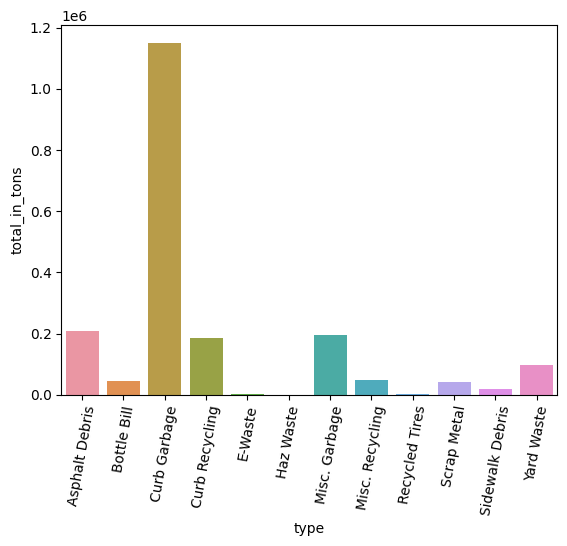

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# bar plot using seaborn 
# bar plot provide a nice view of how garbage types vary in total tons
# note: groupby is a way of aggregate data based on the same value within the given variable
#       in this case, I sum all the waste across the entire dataset by its garbage type
sns.barplot(data.groupby('type',as_index=False).sum(), 
            x='type', 
            y='total_in_tons')

# rotate x axis to make label visible
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Curb Recycling'),
  Text(1, 0, 'Misc. Garbage'),
  Text(2, 0, 'Curb Garbage'),
  Text(3, 0, 'E-Waste'),
  Text(4, 0, 'Haz Waste'),
  Text(5, 0, 'Yard Waste'),
  Text(6, 0, 'Recycled Tires'),
  Text(7, 0, 'Scrap Metal'),
  Text(8, 0, 'Bottle Bill'),
  Text(9, 0, 'Misc. Recycling'),
  Text(10, 0, 'Sidewalk Debris'),
  Text(11, 0, 'Asphalt Debris')])

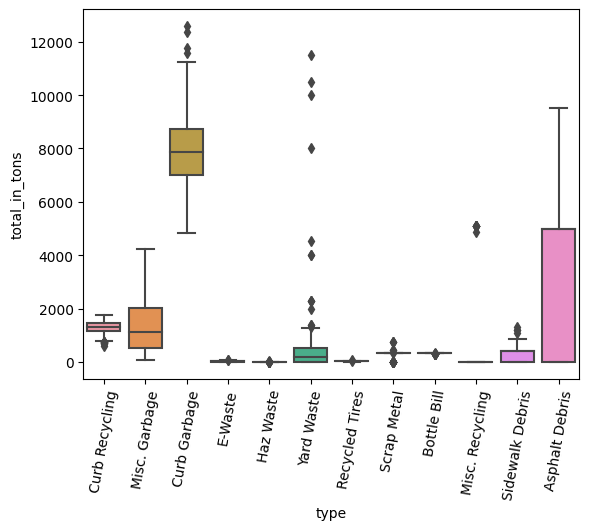

In [8]:
# box plot using seaborn 
# box plot provide different visualizatoin compare to bar plot
# it gives you average ton per garbage types and outlier within each type

sns.boxplot(data, 
            x='type', 
            y='total_in_tons')

# rotate x axis to make label visible
plt.xticks(rotation=80)

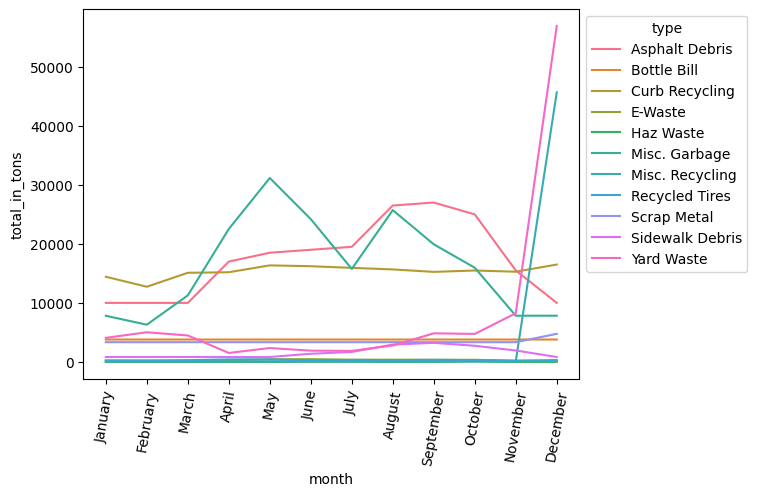

In [23]:
# from last plot you may notice the outlier in yard waste is a lot higher than averge yard waste per month
# Let's take a closer look to see if this is true or is it some kind of error

# filter out larger amount of data (Curb Garbage) to make other garbage type more visible
filtered_data = data[data['type'] != 'Curb Garbage']
lineplt = sns.lineplot(filtered_data.groupby(['type','month'], as_index=False).sum(), 
            x='month', 
            y='total_in_tons',
            hue='type')

# rotate x axis to make label visible
plt.xticks(rotation=80)
sns.move_legend(lineplt, "upper left", bbox_to_anchor=(1, 1))

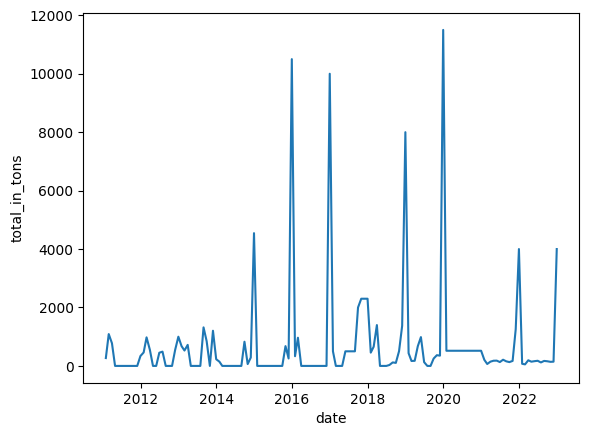

In [ ]:

# only looking at Yard waste
filtered_data = data[data['type'] == 'Yard Waste']

# from this plot you may notice that there are several spikes on the plot and fall into the December period
# it doesn't just appear in one year, the trend may not caused by error
lineplt = sns.lineplot(filtered_data, 
            x='date', 
            y='total_in_tons')
